In [1]:
import gwpy
from gwpy.timeseries import TimeSeries
from gwosc.datasets import event_gps
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
gps = event_gps("GW150914")
H1data = TimeSeries.fetch_open_data('H1', gps-5, gps+5)
L1data = TimeSeries.fetch_open_data('L1', gps-5, gps+5)

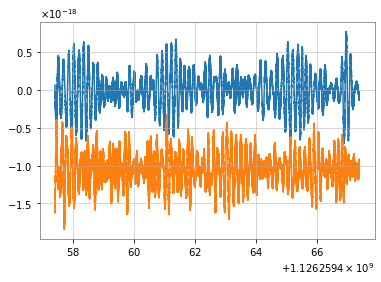

In [3]:
plt.plot(H1data.times,H1data.value)
plt.plot(L1data.times,L1data.value)

In [4]:
H1data.asd(4,2)

<FrequencySeries([6.96245290e-21, 2.22909215e-20, 8.47401812e-21,
                  ..., 1.35281939e-25, 1.48365791e-25,
                  5.02784558e-26]
                 unit=Unit("1 / Hz(1/2)"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.25 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1126259457.399902>,
                 name='Strain',
                 channel=None)>

In [5]:
import jax.numpy as jnp
from ripple.waveforms.IMRPhenomD import gen_IMRPhenomD_polar
def gen_waveform(f, theta):
    theta_waveform = theta[:9]
    ra = theta[9]
    dec = theta[10]
    hp, hc = gen_IMRPhenomD_polar(f, theta_waveform)
    return hp, hc

ref_param = jnp.array([ 3.41096639e+01,  2.42240502e-01,  7.03845904e-02,
              1.45055597e-01,  4.00156164e+02, -1.97202379e+00,
              1.08177416e+00, -6.94499550e-02,  1.95503312e+00,
              8.60901399e-01,  2.89425087e+00])

2025-05-07 13:34:46.789638: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.6 which is older than the PTX compiler version (12.8.93). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


ImportError: cannot import name 'gen_IMRPhenomD_polar' from 'ripple.waveforms.IMRPhenomD' (/data/leuven/347/vsc34717/python/miniconda3/envs/lisa102/lib/python3.10/site-packages/ripple/waveforms/IMRPhenomD.py)

In [ ]:
h1asd = H1data.asd(4,2).value
f = H1data.asd(4,2).frequencies.value
h1asd = h1asd[(f>20)*(f<2048)]
f = f[(f>20)*(f<2048)]
f = jnp.array(f)

In [ ]:
hp, hc = gen_waveform(f, ref_param)
hp2,hc2 = gen_waveform(f, jnp.array([ 3.41096639e+01,  2.42240502e-01,  7.03845904e-02,
              1.45055597e-01,  4.00156164e+02, -1.97202379e+00,
              1.08177416e+00, -6.94499550e-02,  1.95503312e+00,
              8.60901399e-01,  2.89425087e+00]))

In [ ]:
plt.loglog(f,h1asd)
plt.loglog(f,jnp.abs(hp))
plt.ylim(1e-24,1e-20)

In [ ]:
plt.plot(jnp.fft.ifft(hp))

In [ ]:
np.fft.fftfreq(H1data.times.value.shape[0],H1data.dt.value).shape

In [ ]:
H1data.asd(4,2)

In [65]:
H1data.dt

<Quantity 0.00024414 s>